We are going to use the famous iris data set for our KNN example. 


The dataset consists of four attributes: sepal-width, sepal-length, petal-width and petal-length. 



These are the attributes of specific types of iris plant. 


The task is to predict the class to which these plants belong. There are three classes in the dataset: Iris-setosa, Iris-versicolor and Iris-virginica. 


Further details of the dataset are available here.
https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

## Question

Please import, preprocess the data, train-test split, feature scale it, make predictions, and please evaluate it. 

Please also calculate the error rate for K values of 1 to 40. 

In each iteration the mean error for predicted values of test set is calculated and the result is appended to the error list.

The next step is to plot the error values against K values.

In [31]:
import numpy as np
import pandas as pd
import math
from sklearn.metrics.pairwise import paired_distances
from sklearn.metrics.pairwise import euclidean_distances
from statistics import mean 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv("iris.csv")

In [33]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [34]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
h = []
for i in df.species:
    if i == 'Iris-setosa':
        h.append(0)
    elif i == 'Iris-versicolor':
        h.append(1)
    elif i == 'Iris-virginica':
        h.append(2)
        

In [36]:

df["species"]=h
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [37]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 4].values


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train) 

y_pred = neigh.predict(X_test)

In [41]:
print(confusion_matrix(y_test,y_pred))

[[ 9  0  0]
 [ 0 11  1]
 [ 0  0  9]]


In [42]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [43]:
D = []
for i in range(1,41):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train) 
    y_pred = neigh.predict(X_test)
    D.append(mean_absolute_error(y_test,y_pred))
    #D.append(mean_squared_error(y_pred,y_test))


In [44]:
D

[0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.0,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.06666666666666667,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.06666666666666667]

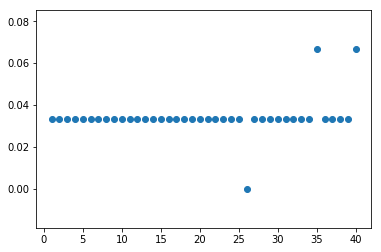

In [45]:
plt.scatter(list(range(1,41)), D)

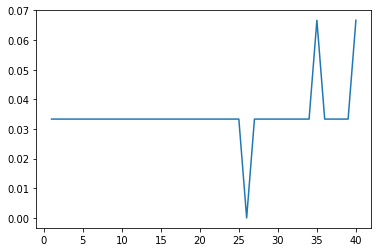

In [46]:
plt.plot(list(range(1,41)), D)